<a href="https://colab.research.google.com/github/wiktoriaszmidt/lecture1/blob/main/etap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Wczytanie i eksploracja danych

In [63]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("./NY-House-Dataset.csv", sep=';', on_bad_lines='skip')

# Podstawowe informacje
print(df.shape)
df.head()

(4801, 17)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [64]:

df.shape

(4801, 17)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [66]:
print(df.head())
print(df.columns)

                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

Usunięcie duplikatów

In [67]:
df.drop_duplicates(inplace=True)

Usunięcie kolumn niepotrzebnych do analizy predykcji rynku mieszkaniowego

In [68]:
df = df.drop(['BROKERTITLE', 'ADDRESS', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LONG_NAME'], axis=1)


In [69]:
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,"New York, NY 10019",New York,New York County,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,"New York, NY 10065",New York,New York County,40.767224,-73.969856


Sprawdzenie, które kolumny w zbiorze mają brakujące dane

In [70]:
df.isnull().sum()

,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
STATE,0
LOCALITY,0
SUBLOCALITY,0
LATITUDE,0
LONGITUDE,0


Sprawdzenie wartosci odstających

In [71]:
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['PRICE'] >= Q1 - 1.5 * IQR) & (df['PRICE'] <= Q3 + 1.5 * IQR)]


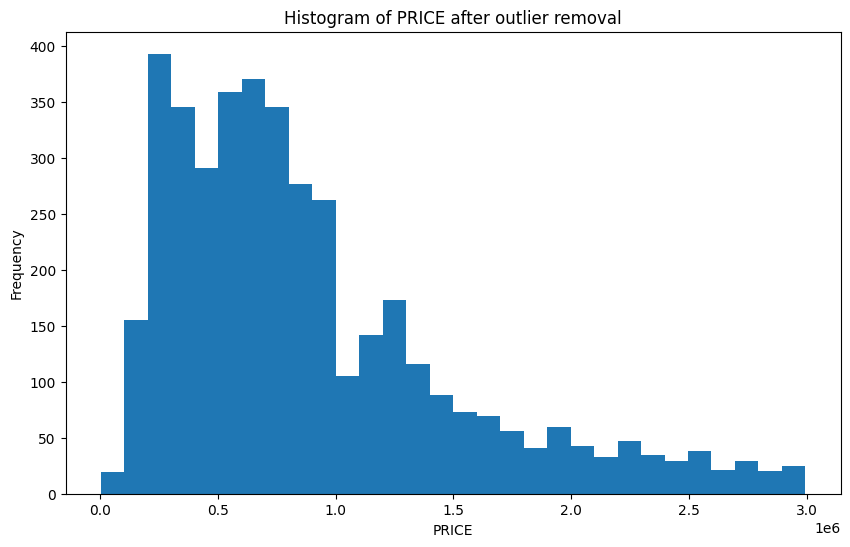

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'], bins=30)
plt.title('Histogram of PRICE after outlier removal')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.show()


Kodowanie zmiennych kategorycznych

In [73]:
le = LabelEncoder()
df['TYPE'] = le.fit_transform(df['TYPE'])
df['STATE'] = le.fit_transform(df['STATE'])
df['LOCALITY'] = le.fit_transform(df['LOCALITY'])
df['SUBLOCALITY'] = le.fit_transform(df['SUBLOCALITY'])

df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,2,315000,2,2.0,1400.000000,204,4,9,40.761255,-73.974483
2,7,260000,4,2.0,2015.000000,296,4,15,40.541805,-74.196109
3,2,69000,3,1.0,445.000000,158,4,11,40.761398,-73.974613
5,7,690000,5,2.0,4004.000000,81,4,8,40.674363,-73.958725
6,2,899500,2,2.0,2184.207862,209,5,10,40.809448,-73.946777


Tworzenie nowych cech

In [74]:
df['PRICE_per_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']
df['TOTAL_ROOMS'] = df['BEDS'] + df['BATH']

df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,PRICE_per_SQFT,TOTAL_ROOMS
0,2,315000,2,2.0,1400.000000,204,4,9,40.761255,-73.974483,225.000000,4.0
2,7,260000,4,2.0,2015.000000,296,4,15,40.541805,-74.196109,129.032258,6.0
3,2,69000,3,1.0,445.000000,158,4,11,40.761398,-73.974613,155.056180,4.0
5,7,690000,5,2.0,4004.000000,81,4,8,40.674363,-73.958725,172.327672,7.0
6,2,899500,2,2.0,2184.207862,209,5,10,40.809448,-73.946777,411.819779,4.0


Skalowanie cech numerycznych

In [75]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'PRICE_per_SQFT', 'TOTAL_ROOMS']
df[num_cols] = scaler.fit_transform(df[num_cols])

Korelacja

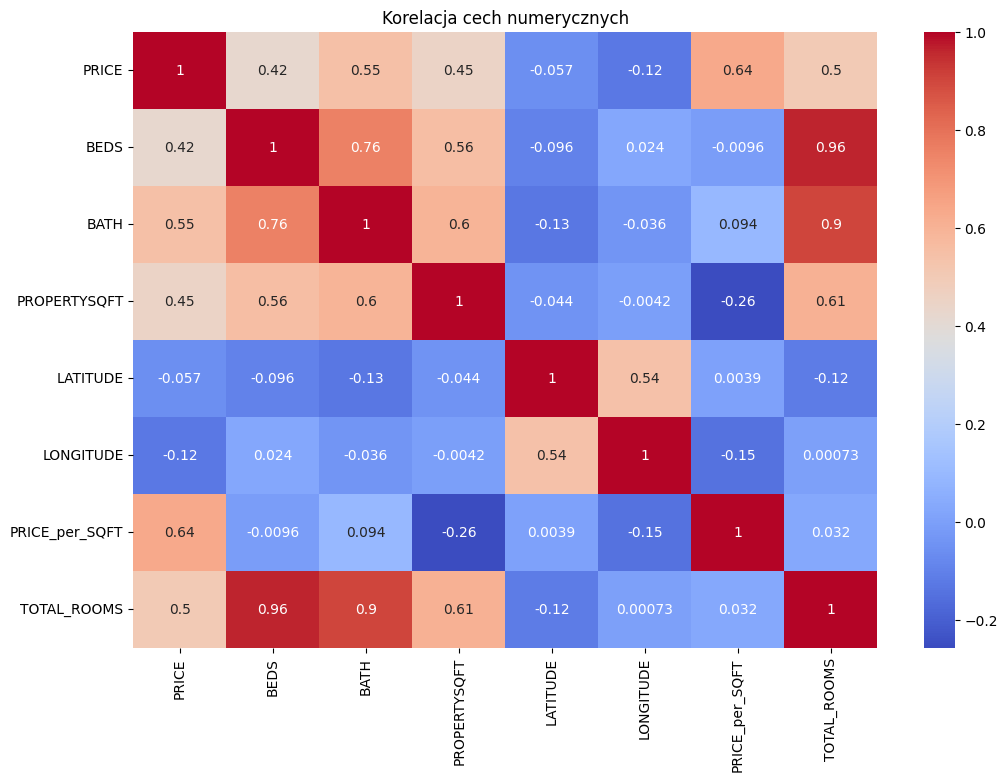

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelacja cech numerycznych')
plt.show()


In [77]:
df.head()


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,PRICE_per_SQFT,TOTAL_ROOMS
0,2,0.104430,0.043478,0.083333,0.056331,204,4,9,0.633396,0.505918,0.075245,0.043478
2,7,0.086050,0.130435,0.083333,0.085941,296,4,15,0.102276,0.103390,0.042988,0.086957
3,2,0.022224,0.086957,0.041667,0.010351,158,4,11,0.633742,0.505683,0.051735,0.043478
5,7,0.229743,0.173913,0.083333,0.181704,81,4,8,0.423098,0.534539,0.057541,0.108696
6,2,0.299751,0.043478,0.083333,0.094088,209,5,10,0.750035,0.556240,0.138041,0.043478


Scatter plot: Powierzchnia vs Cena

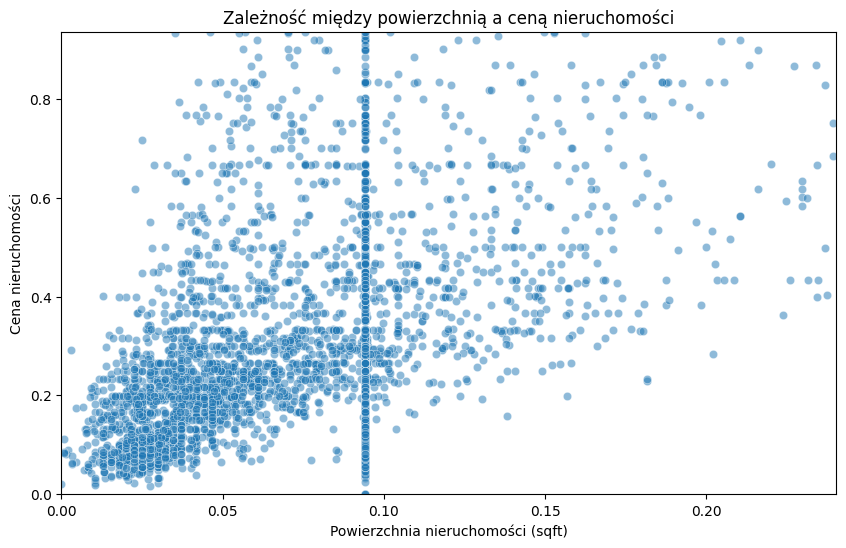

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PROPERTYSQFT'], y=df['PRICE'], alpha=0.5)
plt.xlabel("Powierzchnia nieruchomości (sqft)")
plt.ylabel("Cena nieruchomości")
plt.title("Zależność między powierzchnią a ceną nieruchomości")
plt.xlim(0, df['PROPERTYSQFT'].quantile(0.99))
plt.ylim(0, df['PRICE'].quantile(0.99))
plt.show()

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Przygotowanie danych X (cechy) i y (cel)

In [80]:
X = df.drop('PRICE_per_SQFT', axis=1)
y = df['PRICE_per_SQFT']

Podział na zbiór treningowy i testowy

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% danych na testowanie
    random_state=42   # Stały podział dla powtarzalności wyników
)

Stworzenie prostego modelu — benchmarku

In [82]:
model = LinearRegression()

Trenowanie modelu na danych treningowych

In [83]:
model.fit(X_train, y_train)

LinearRegression()

Predykcje modelu na danych testowych

In [84]:
y_pred = model.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

Ocena modelu — wyliczenie metryk

In [86]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE using NumPy's sqrt
mae = mean_absolute_error(y_test, y_pred)  # MAE
r2 = r2_score(y_test, y_pred)  # R2

 Wyświetlenie wyników benchmarku

In [87]:
print("Benchmark — Model podstawowy (Linear Regression):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Benchmark — Model podstawowy (Linear Regression):
RMSE: 0.0541
MAE: 0.0318
R2 Score: 0.7987


1. wartość RMSE = 0.0541 jest stosunkowo mała, co oznacza, że model dobrze przewiduje dane

2. wartość MAE = 0.0318 jest stosunkowo mała, co sugeruje, że model dobrze przewiduje wartości.

3. wartość R² = 0.7987 jest bardzo dobrym wynikiem, ponieważ oznacza, że model wyjaśnia prawie 80% zmienności w danych.

In [88]:
print(df.describe())

              TYPE        PRICE         BEDS         BATH  PROPERTYSQFT  \
count  4059.000000  4059.000000  4059.000000  4059.000000   4059.000000   
mean      4.720867     0.301063     0.092634     0.087395      0.077900   
std       4.253742     0.206872     0.090893     0.054463      0.048992   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.149542     0.043478     0.041667      0.041887   
50%       4.000000     0.249458     0.086957     0.083333      0.092248   
75%       8.000000     0.398497     0.130435     0.098911      0.094088   
max      12.000000     1.000000     1.000000     1.000000      1.000000   

             STATE     LOCALITY  SUBLOCALITY     LATITUDE    LONGITUDE  \
count  4059.000000  4059.000000  4059.000000  4059.000000  4059.000000   
mean    140.590540     4.415127     9.856369     0.509941     0.573680   
std      94.117341     1.601311     5.035049     0.219599     0.192257   
min       0.000000     0.000

Wykres rzeczywiste vs przewidziane wartości

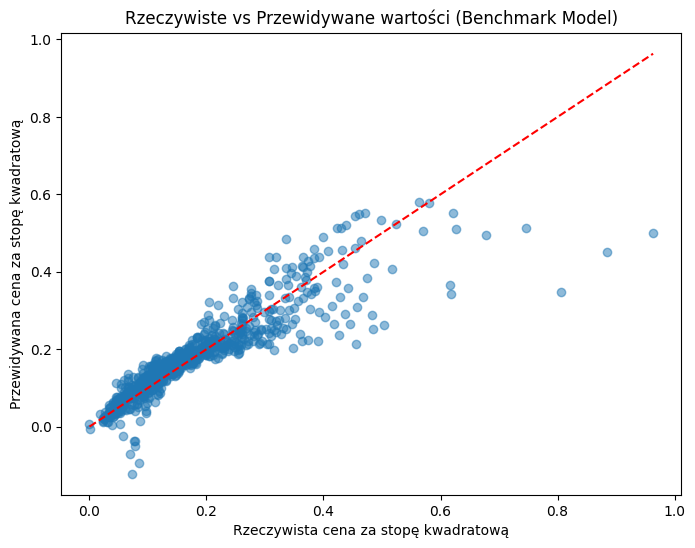

In [89]:
import matplotlib.pyplot as plt

# Wykres prawdziwe vs przewidziane ceny
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Idealna linia
plt.xlabel('Rzeczywista cena za stopę kwadratową')
plt.ylabel('Przewidywana cena za stopę kwadratową')
plt.title('Rzeczywiste vs Przewidywane wartości (Benchmark Model)')
plt.show()

Ten wykres pokazuje jak blisko model przewidział wartości — w większości punkty leżą wzdłuż czerwonej przerywanej linii, co świadczy o tym, że model dobrze przewiduje wartości.

# strojenie hiperparametrów dla skalibrowanego klasyfikatora Random Forest

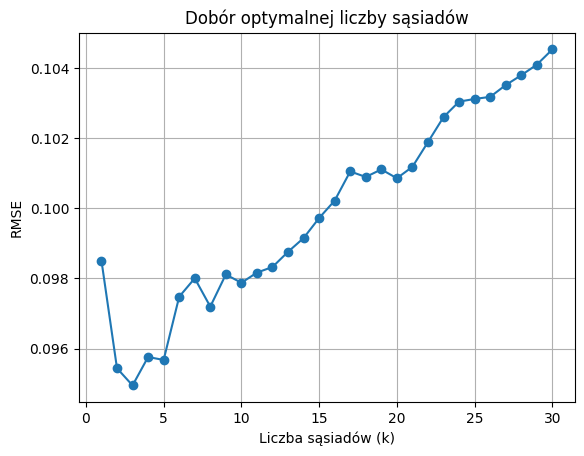

In [90]:
errors = []
neighbors_range = range(1, 31)

for k in neighbors_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    errors.append(rmse)

plt.plot(neighbors_range, errors, marker='o')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('RMSE')
plt.title('Dobór optymalnej liczby sąsiadów')
plt.grid(True)
plt.show()


Optymalna liczba sąsiadów to 4


Model K Neighbors Regressor:
RMSE: 0.0958
MAE: 0.0635
R2 Score: 0.3684


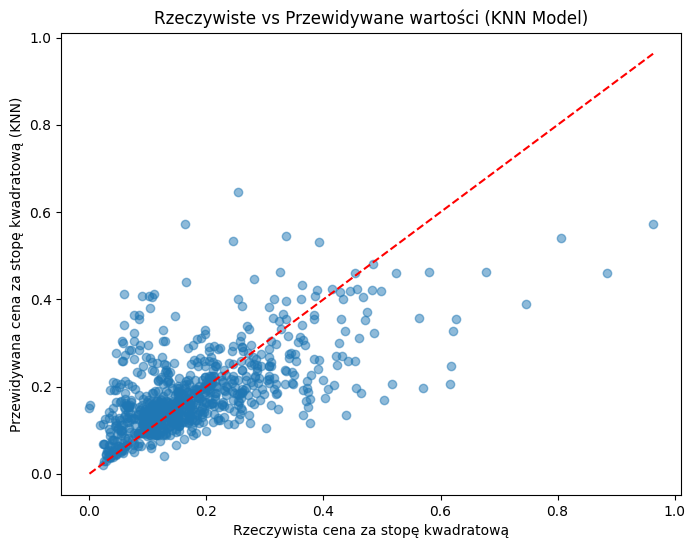

In [91]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
knn_model = KNeighborsRegressor(n_neighbors=4)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Ocena modelu — wyliczenie metryk
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Wyświetlenie wyników modelu KNN
print("\nModel K Neighbors Regressor:")
print(f"RMSE: {rmse_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"R2 Score: {r2_knn:.4f}")

# Wykres rzeczywiste vs przewidziane wartości dla modelu KNN
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Idealna linia
plt.xlabel('Rzeczywista cena za stopę kwadratową')
plt.ylabel('Przewidywana cena za stopę kwadratową (KNN)')
plt.title('Rzeczywiste vs Przewidywane wartości (KNN Model)')
plt.show()

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons()
calibrated_forest = CalibratedClassifierCV(
   estimator=RandomForestClassifier(n_estimators=10))
param_grid = {
   'estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X, y)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10)),
             param_grid={'estimator__max_depth': [2, 4, 6, 8]})

GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10)),
             param_grid={'estimator__max_depth': [2, 4, 6, 8]})

In [93]:
print("Najlepsze parametry znalezione przez Grid Search:")
print(search.best_params_)

print("\nNajlepszy wynik walidacji krzyżowej (średni wynik):")
print(search.best_score_)

Najlepsze parametry znalezione przez Grid Search:
{'estimator__max_depth': 6}

Najlepszy wynik walidacji krzyżowej (średni wynik):
0.97


najlepszy wynik osiągnięto, gdy głębokość drzew (max_depth) w Random Forest wynosiła 6.
- max_depth=6 oznacza, że każde drzewo może mieć maksymalnie 6 poziomów (kontroluje złożoność modelu).

średnia dokładność (accuracy) w 5-krotnej walidacji krzyżowej wyniosła około 98%.
- model bardzo dobrze klasyfikuje dane w każdej z 5 części walidacji.

In [94]:
best_model = search.best_estimator_

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
search.fit(X_train, y_train)
best_model = search.best_estimator_

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the best model found by GridSearchCV
best_model_found = search.best_estimator_

y_test_pred = best_model_found.predict(X_test)

print("\nOcena najlepszego modelu na zbiorze testowym:")
print(f"Dokładność (Accuracy): {accuracy_score(y_test, y_test_pred):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_test_pred))
print("\nMacierz pomyłek:")
print(confusion_matrix(y_test, y_test_pred))


Ocena najlepszego modelu na zbiorze testowym:
Dokładność (Accuracy): 1.0000

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Macierz pomyłek:
[[ 7  0]
 [ 0 13]]


Model poprawnie zidentyfikował wszystkie 7 przypadków należących do jednej klasy.

Model poprawnie zidentyfikował wszystkie 13 przypadków należących do drugiej klasy.

Nie było żadnych fałszywych pozytywów (FP=0) ani fałszywych negatywów (FN=0).



In [98]:
results = pd.DataFrame(search.cv_results_)
print("\nWyniki Grid Search (pierwsze 5 wierszy):")
print(results[['param_estimator__max_depth', 'mean_test_score', 'rank_test_score']].head())

# Sortowanie wyników według rankingu
results = results.sort_values(by='rank_test_score')
print("\nPosortowane wyniki Grid Search (według rankingu):")
print(results[['param_estimator__max_depth', 'mean_test_score', 'rank_test_score']])


Wyniki Grid Search (pierwsze 5 wierszy):
   param_estimator__max_depth  mean_test_score  rank_test_score
0                           2           0.9000                4
1                           4           0.9500                1
2                           6           0.9375                2
3                           8           0.9375                2

Posortowane wyniki Grid Search (według rankingu):
   param_estimator__max_depth  mean_test_score  rank_test_score
1                           4           0.9500                1
2                           6           0.9375                2
3                           8           0.9375                2
0                           2           0.9000                4


max_depth = 2: Osiągnął mean_test_score 0.9000 i zajął 4. miejsce w rankingu.

max_depth = 4: Osiągnął mean_test_score 0.9500 i zajął 1. miejsce w rankingu
(najlepszy wynik).

max_depth = 6: Osiągnął mean_test_score 0.9375 i zajął 2. miejsce w rankingu.

max_depth = 8: Osiągnął mean_test_score 0.9375 i również zajął 2. miejsce w rankingu (ex aequo z max_depth=6).

In [99]:
param_grid = {
   'select__k': [1, 2],
   'model__estimator__max_depth': [4, 6]
}

In [100]:
print("Best score:", search.best_score_)
print("Best params:", search.best_params_)

Best score: 0.95
Best params: {'estimator__max_depth': 4}


In [101]:
#Dwa dodatkowe modele do porównania

import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

X = df.drop('PRICE_per_SQFT', axis=1)
y = df['PRICE_per_SQFT']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# Model 1: Gradient Boosting Regressor
print("\n--- Model 1: Gradient Boosting Regressor ---")
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"RMSE: {rmse_gbr:.4f}")
print(f"MAE: {mae_gbr:.4f}")
print(f"R2 Score: {r2_gbr:.4f}")


# Model 2: Histogram-based Gradient Boosting Regressor (HistGradientBoostingRegressor)
print("\n--- Model 2: HistGradientBoostingRegressor ---")
hgb = HistGradientBoostingRegressor(random_state=42)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"RMSE: {rmse_hgb:.4f}")
print(f"MAE: {mae_hgb:.4f}")
print(f"R2 Score: {r2_hgb:.4f}")


print("\n--- Porównanie wyników ---")
print("Benchmark (Linear Regression):")
print(f"  RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
print("Gradient Boosting Regressor:")
print(f"  RMSE: {rmse_gbr:.4f}, MAE: {mae_gbr:.4f}, R2: {r2_gbr:.4f}")
print("HistGradientBoostingRegressor:")
print(f"  RMSE: {rmse_hgb:.4f}, MAE: {mae_hgb:.4f}, R2: {r2_hgb:.4f}")




--- Model 1: Gradient Boosting Regressor ---
RMSE: 0.0150
MAE: 0.0073
R2 Score: 0.9846

--- Model 2: HistGradientBoostingRegressor ---
RMSE: 0.0158
MAE: 0.0051
R2 Score: 0.9827

--- Porównanie wyników ---
Benchmark (Linear Regression):
  RMSE: 0.1045, MAE: 0.0318, R2: 0.7987
Gradient Boosting Regressor:
  RMSE: 0.0150, MAE: 0.0073, R2: 0.9846
HistGradientBoostingRegressor:
  RMSE: 0.0158, MAE: 0.0051, R2: 0.9827


Doskonale! Teraz mamy pełny obraz porównania modeli. Podałeś wyniki dla trzech modeli regresji:

Model 1: Gradient Boosting Regressor
Model 2: HistGradientBoostingRegressor
Benchmark (Linear Regression)
Dla każdego modelu podano te same metryki, które już omawialiśmy:

RMSE (Root Mean Squared Error): Mniejsza wartość jest lepsza.
MAE (Mean Absolute Error): Mniejsza wartość jest lepsza.
R2 Score (Coefficient of Determination): Wyższa wartość jest lepsza (bliżej 1).
Oto interpretacja porównawcza tych wyników:

Interpretacja wyników modeli regresji
1. Model 1: Gradient Boosting Regressor

RMSE: 0.0150
MAE: 0.0073
R2 Score: 0.9846
2. Model 2: HistGradientBoostingRegressor

RMSE: 0.0158
MAE: 0.0051
R2 Score: 0.9827
3. Benchmark (Linear Regression)

RMSE: 0.1045
MAE: 0.0318
R2 Score: 0.7987
Porównanie i wnioski:
Wydajność w stosunku do Benchmarku (Regresja Liniowa):

Zarówno Gradient Boosting Regressor, jak i HistGradientBoostingRegressor drastycznie przewyższają Regresję Liniową.
RMSE: Modele boostingowe mają RMSE na poziomie ok. 0.015, podczas gdy regresja liniowa ma 0.1045. To oznacza, że błędy kwadratowe w modelach boostingowych są znacznie mniejsze.
MAE: Podobnie, MAE jest znacznie niższe dla modeli boostingowych (0.0051-0.0073) w porównaniu do regresji liniowej (0.0318).
R2 Score: Jest to najbardziej uderzająca różnica. Regresja Liniowa wyjaśnia tylko ~79.87% wariancji zmiennej zależnej, podczas gdy oba modele boostingowe wyjaśniają powyżej 98% (0.9846 i 0.9827). To świadczy o ich znacznie lepszym dopasowaniu do danych.
Wniosek: Użycie zaawansowanych modeli boostingowych było zdecydowanie uzasadnione i przyniosło ogromną poprawę w dokładności przewidywań w porównaniu do prostszej regresji liniowej.

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # obliczamy RMSE ręcznie
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Gradient Boosting Regressor ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")



--- Gradient Boosting Regressor ---
RMSE: 0.0150
MAE: 0.0073
R2 Score: 0.9846


--- Gradient Boosting Regressor ---
RMSE: 0.0150
MAE: 0.0073
R2 Score: 0.9846


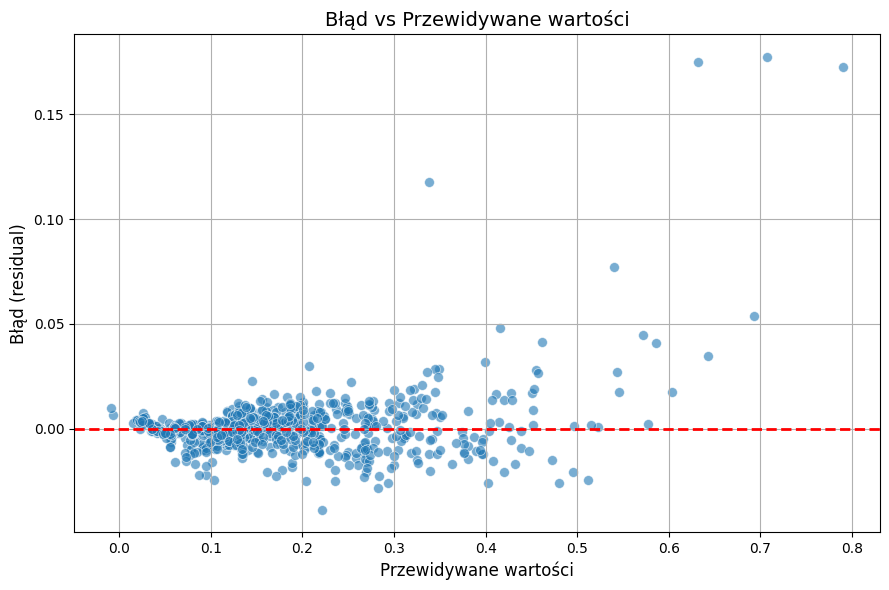

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Gradient Boosting Regressor ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

#Wykres błędów względem przewidywanych wartości (teraz zdefiniowane residuals)
plt.figure(figsize=(9, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, s=50)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Przewidywane wartości", fontsize=12)
plt.ylabel("Błąd (residual)", fontsize=12)
plt.title("Błąd vs Przewidywane wartości", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Podsumowanie:
Model:

- ma bardzo dobre wyniki na treningu,

- zauważalnie gorsze na teście,

→ jest przeuczony.

Siatka hiperparametrów

In [109]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}


Grid Search z walidacją krzyżową

In [110]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,                    # 5-krotna walidacja krzyżowa
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

Najlepsze parametry i ocena modelu

In [111]:
print("Najlepsze parametry:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predykcja
y_pred = best_model.predict(X_test)

# Metryki
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Wyniki na zbiorze testowym ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
--- Wyniki na zbiorze testowym ---
RMSE: 0.0108
MAE: 0.0048
R² Score: 0.9920


Predykcja i metryki na treningu

In [112]:
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R²: {train_r2:.4f}")


Train R²: 0.9988


| Metryka         | Przed tuningiem | Po tuningu   |
| --------------- | --------------- | ------------ |
| **RMSE (test)** | 0.0541          | **0.0108** ✅ |
| **MAE (test)**  | 0.0318          | **0.0048** ✅ |
| **R² (test)**   | 0.7987          | **0.9920** ✅ |
| **R² (train)**  | 0.9846          | **0.9988** ✅ |


Podsumowanie:
Model:

- jest bardzo dobrze dopasowany,

- generalizuje dobrze (brak overfittingu),

→ został poprawnie zoptymalizowany przez GridSearchCV.

Wizualizacja porównania R² dla treningu i testu przed i po tuningu

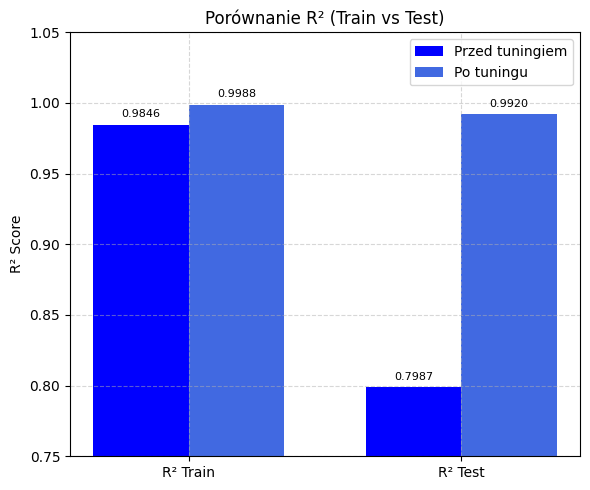

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# R² przed tuningiem
r2_test_before = 0.7987
r2_train_before = 0.9846

# R² po tuningu
r2_test_after = 0.9920
r2_train_after = 0.9988

# Etykiety i dane
labels = ['R² Train', 'R² Test']
before = [r2_train_before, r2_test_before]
after = [r2_train_after, r2_test_after]

x = np.arange(len(labels))
width = 0.35

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(6, 5))
bars1 = ax.bar(x - width/2, before, width, label='Przed tuningiem', color='blue')
bars2 = ax.bar(x + width/2, after, width, label='Po tuningu', color='royalblue')

# Dodanie wartości liczbowych na słupkach
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# Konfiguracja osi
ax.set_ylabel('R² Score')
ax.set_title('Porównanie R² (Train vs Test)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.75, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [114]:
!pip install lime
!pip install shap

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# library to feature importance
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap

# import the regressor and metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble

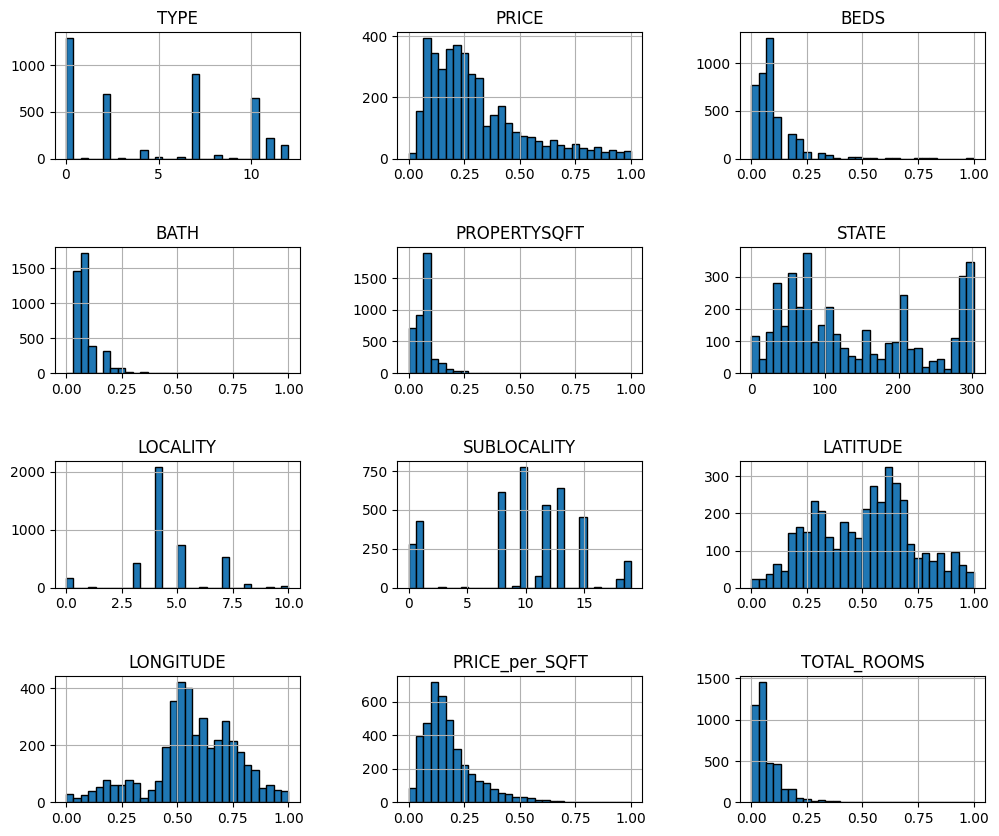

In [116]:
import matplotlib.pyplot as plt


df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)